In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [180]:
simple = pd.read_csv('/Users/flatironschool/Absenteeism_Project/data/processed/binned_wo_imputed.csv')

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [181]:
simple.tail()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,...,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate,grad_slice,grad_rate_bin,four_rate_bins
16568,16568,16568,21854,21854,21854,WYOMING,Sheridan County School District #1,560569000311,Big Horn High School,37,...,0.013245,4.0,0.026490,1738.913907,0.0,0.006623,0.846154,90,90%+,90%+
16569,16569,16569,21858,21858,21858,WYOMING,Sheridan County School District #2,560569500360,Sheridan High School,236,...,0.046796,0.0,0.000000,1694.559176,0.0,0.005086,0.198779,89,80-89%,80-89%
16570,16570,16570,21861,21861,21861,WYOMING,Sweetwater County School District #2,560576200324,Green River High School,176,...,0.141570,1.0,0.001287,1840.877490,0.0,0.003861,0.200000,85,80-89%,80-89%
16571,16571,16571,21863,21863,21863,WYOMING,Teton County School District #1,560583000335,Jackson Hole High School,127,...,0.040625,0.0,0.000000,4153.518984,0.0,0.004687,0.118939,95,90%+,90%+
16572,16572,16572,21866,21866,21866,WYOMING,Washakie County School District #1,560624000343,Worland High School,105,...,0.025000,0.0,0.000000,3015.755325,0.0,0.004275,0.331544,75,70-79%,60-79%


In [182]:
simple['four_rate_bins'].value_counts()

90%+      8712
80-89%    4257
60-79%    1993
0-59%     1611
Name: four_rate_bins, dtype: int64

In [114]:
grad_100 = simple[simple['four_rate_bins'] == '100%']
grad_90 = simple[simple['four_rate_bins'] == '90%-99%']
grad_80 = simple[simple['four_rate_bins'] == '80-89%']
grad_70 = simple[simple['four_rate_bins'] == '60-79%']
grad_50 = simple[simple['four_rate_bins'] == '0-59%']

In [163]:
quantile_df_25 = simple.groupby('four_rate_bins')['non_cert_rate', 'sports_rate', 'chronic_absent_rate', 'suspensed_day_rate'].quantile(.25).reset_index() 


In [164]:
quantile_df_75 = simple.groupby('four_rate_bins')['non_cert_rate', 'sports_rate', 'chronic_absent_rate', 'suspensed_day_rate'].quantile(.75).reset_index() 

In [165]:
quantile_df_25

0.25,four_rate_bins,non_cert_rate,sports_rate,chronic_absent_rate,suspensed_day_rate
0,0-59%,0.0,0.124414,0.085595,0.000000
1,60-79%,0.0,0.220779,0.160080,0.060664
2,80-89%,0.0,0.275554,0.126976,0.052518
3,90%+,0.0,0.320988,0.083107,0.015659


In [166]:
quantile_df_75

0.75,four_rate_bins,non_cert_rate,sports_rate,chronic_absent_rate,suspensed_day_rate
0,0-59%,0.042020,0.406508,0.790489,0.503487
1,60-79%,0.052632,0.451950,0.437500,0.672138
2,80-89%,0.023318,0.536686,0.302113,0.351397
3,90%+,0.001256,0.649728,0.221578,0.145930


In [167]:
simple = simple.merge(quantile_df_75, on='four_rate_bins', suffixes=('_x', '_75th') )

In [168]:
simple = simple.merge(quantile_df_25, on='four_rate_bins', suffixes=('_x', '_25th') )

In [170]:
simple.tail()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,...,level_up_sports_rate_a,level_up_sports_rate_b,non_cert_rate_75th,sports_rate_75th,chronic_absent_rate_75th,suspensed_day_rate_75th,non_cert_rate,sports_rate,chronic_absent_rate,suspensed_day_rate
16568,16533,16533,21787,21787,21787,WYOMING,Big Horn County School District #1,560142000046,Rocky Mountain High School,133,...,0.124414,0.406508,0.04202,0.406508,0.790489,0.503487,0.0,0.124414,0.085595,0.0
16569,16540,16540,21800,21800,21800,WYOMING,Laramie County School District #1,560198000092,Triumph High School,106,...,0.124414,0.406508,0.04202,0.406508,0.790489,0.503487,0.0,0.124414,0.085595,0.0
16570,16555,16555,21832,21832,21832,WYOMING,Niobrara County School District #1,560423000214,Niobrara County High School,103,...,0.124414,0.406508,0.04202,0.406508,0.790489,0.503487,0.0,0.124414,0.085595,0.0
16571,16557,16557,21835,21835,21835,WYOMING,Fremont County School District #14,560445000441,Wyoming Indian High School,50,...,0.124414,0.406508,0.04202,0.406508,0.790489,0.503487,0.0,0.124414,0.085595,0.0
16572,16561,16561,21840,21840,21840,WYOMING,Natrona County School District #1,560451000256,Roosevelt High School,57,...,0.124414,0.406508,0.04202,0.406508,0.790489,0.503487,0.0,0.124414,0.085595,0.0


In [155]:
quantile_df.reset_index().columns[1]

'non_cert_rate'

In [22]:
grad_90.head()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,...,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate,grad_slice,grad_rate_bin,four_rate_bins
0,0,0,0,0,0,ALABAMA,Albertville City,10000500871,Albertville High Sch,296,...,0.060232,0.0,0.000000,2811.937359,0.000000,0.003475,0.378788,92,90%+,90%+
1,1,1,1,1,1,ALABAMA,Marshall County,10000600872,Asbury Sch,67,...,0.018553,2.0,0.003711,4825.189777,0.000000,0.002783,0.100000,95,90%+,90%+
5,5,5,5,5,5,ALABAMA,Hoover City,10000700251,Hoover High Sch,714,...,0.053927,1.0,0.000337,434.833734,0.019066,0.001685,0.333651,92,90%+,90%+
6,6,6,7,7,7,ALABAMA,Hoover City,10000701456,Spain Park High Sch,412,...,0.138342,0.0,0.000000,511.925343,0.016920,0.001789,0.346870,94,90%+,90%+
7,7,7,8,8,8,ALABAMA,Madison City,10000800831,Bob Jones High Sch,451,...,0.041002,2.0,0.001139,72676.817158,0.000000,0.002278,0.019608,97,90%+,90%+


/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


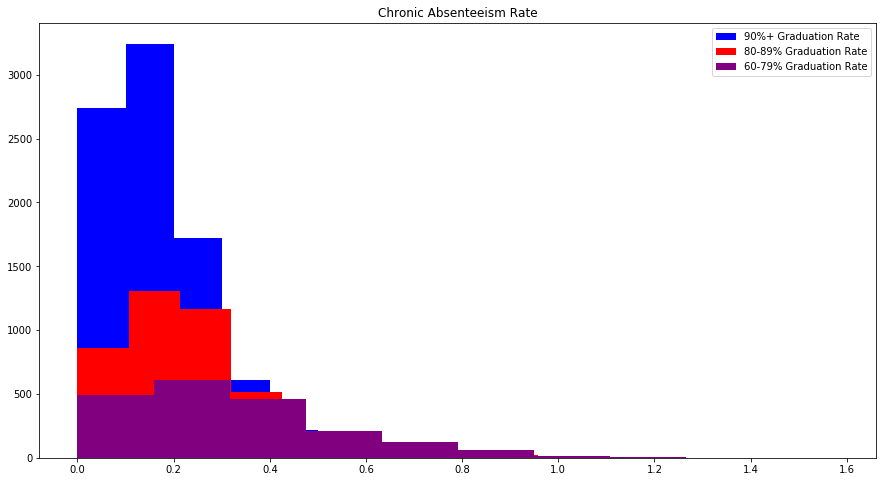

In [171]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['chronic_absent_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['chronic_absent_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['chronic_absent_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.title('Chronic Absenteeism Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


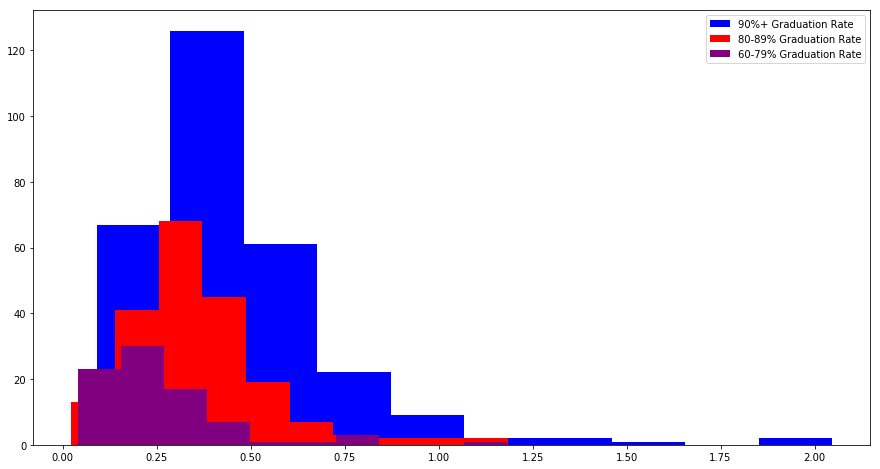

In [26]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['ap_ib_de_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['ap_ib_de_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['ap_ib_de_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


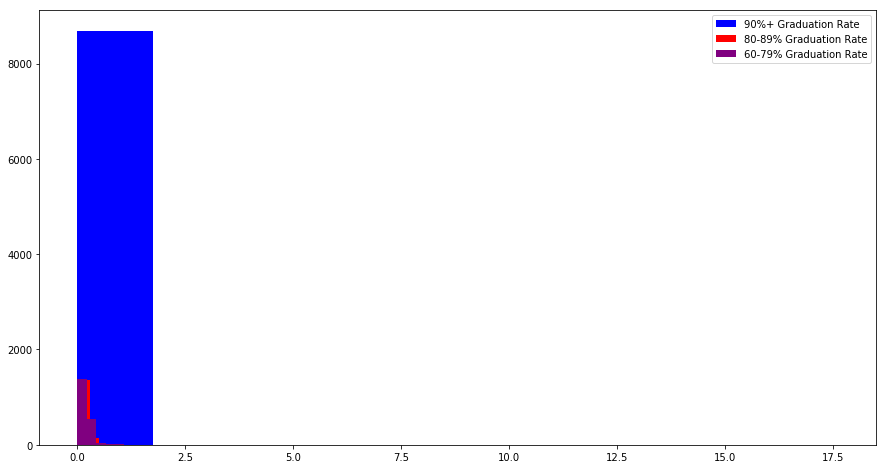

In [27]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['sat_act_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['sat_act_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['sat_act_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


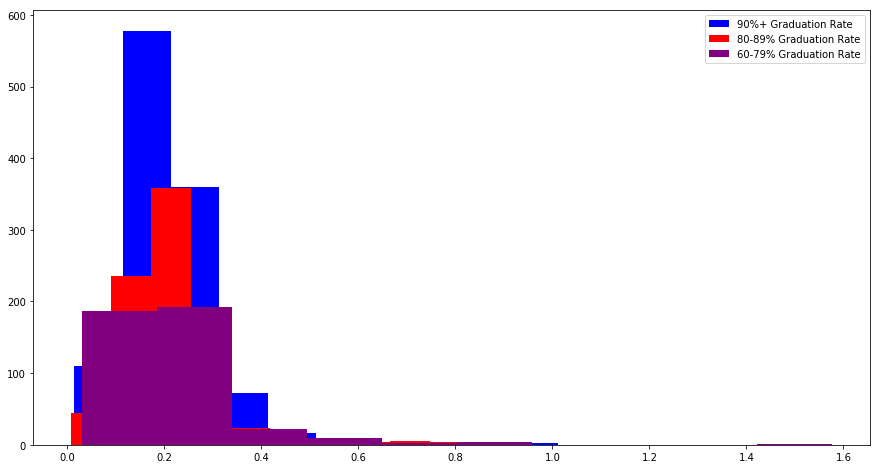

In [28]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['pass_algebra_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['pass_algebra_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['pass_algebra_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


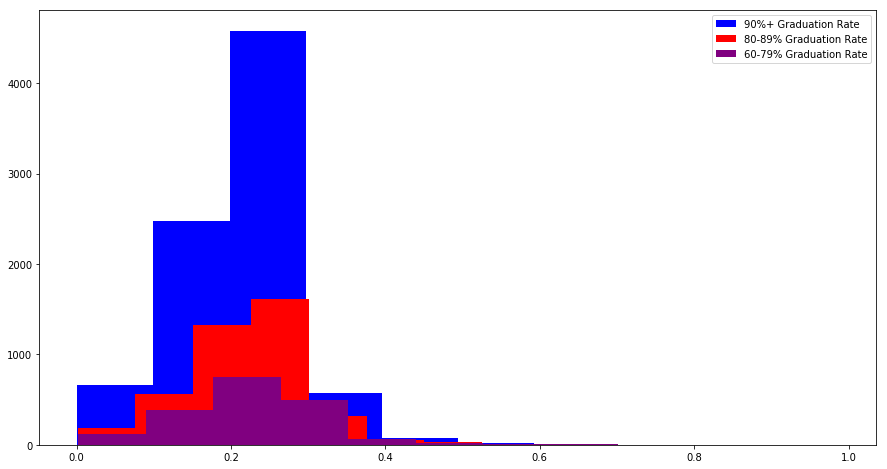

In [29]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['geometry_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['geometry_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['geometry_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


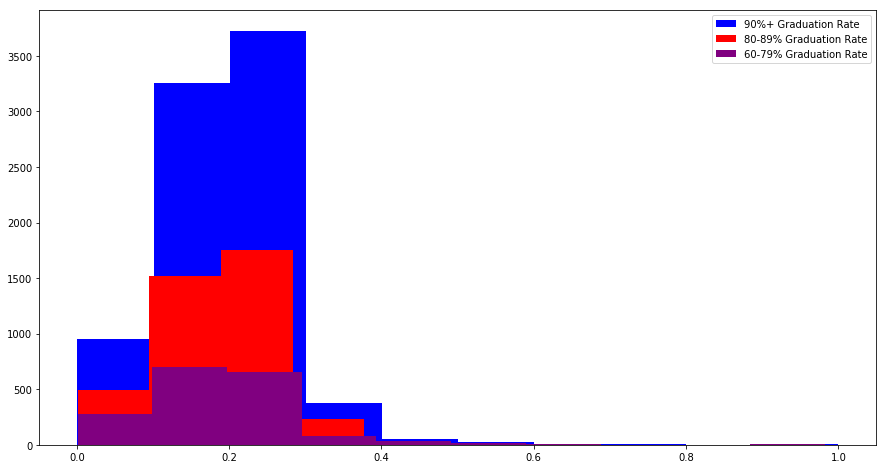

In [30]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['algebra2_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['algebra2_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['algebra2_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


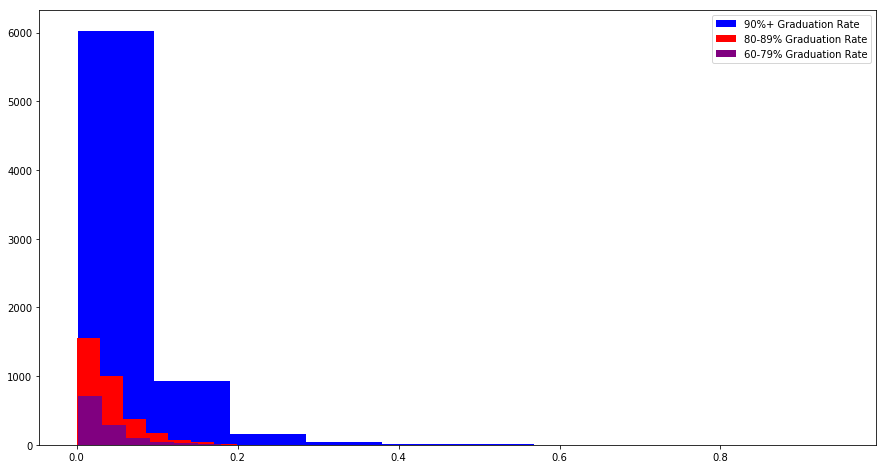

In [31]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['calc_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['calc_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['calc_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


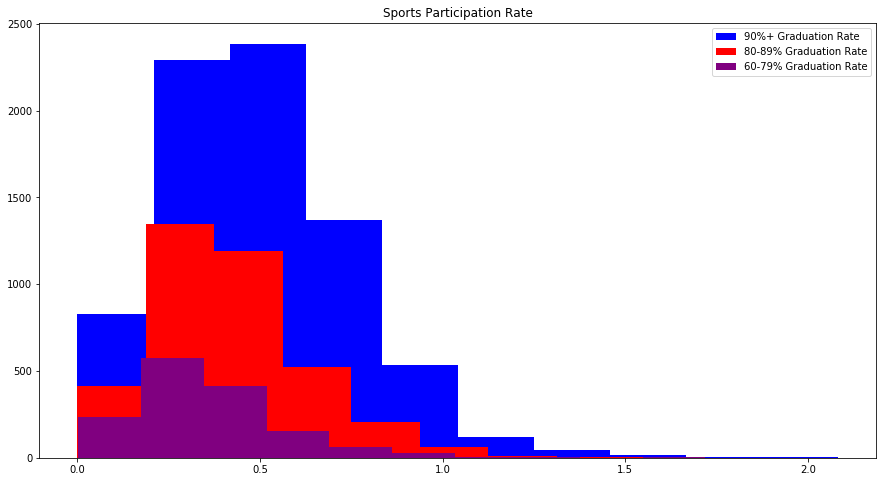

In [172]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['sports_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['sports_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['sports_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.title('Sports Participation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


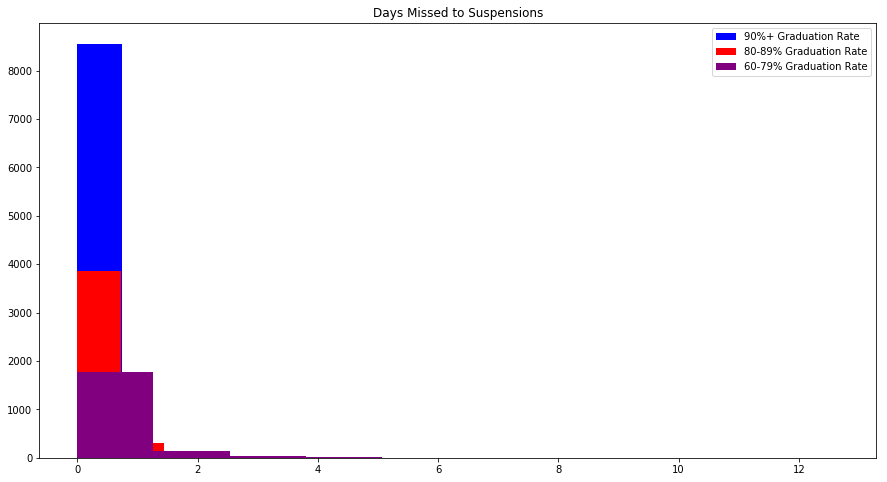

In [173]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['suspensed_day_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['suspensed_day_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['suspensed_day_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.title('Days Missed to Suspensions')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


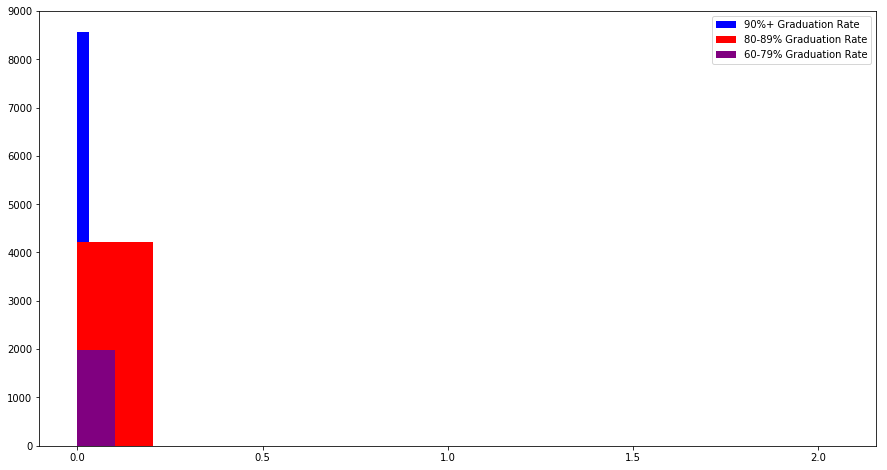

In [34]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['harassed_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['harassed_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['harassed_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


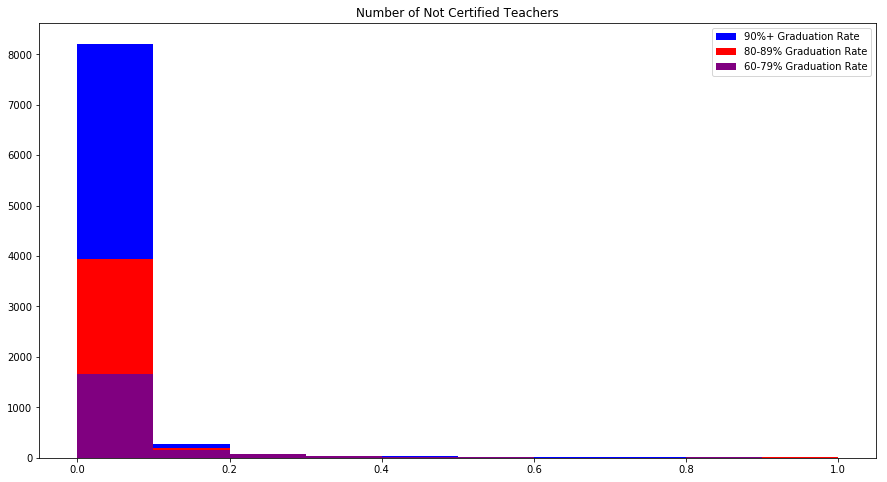

In [174]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['non_cert_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['non_cert_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['non_cert_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.title('Number of Not Certified Teachers')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


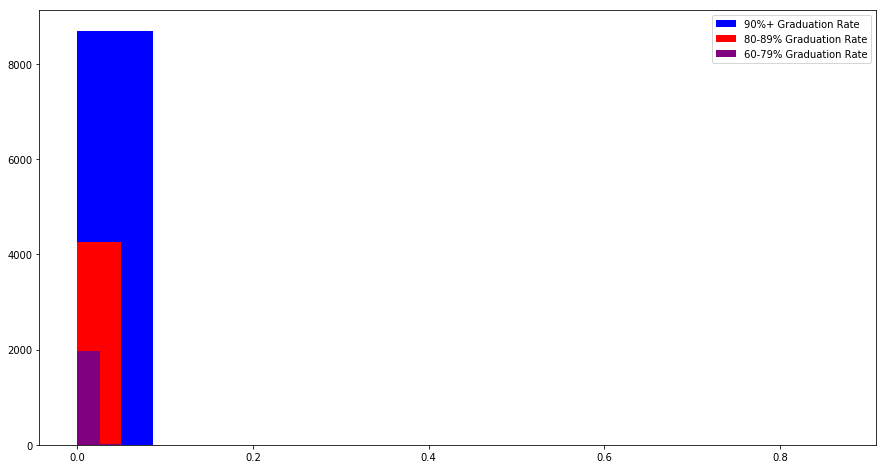

In [36]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['counselor_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['counselor_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['counselor_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


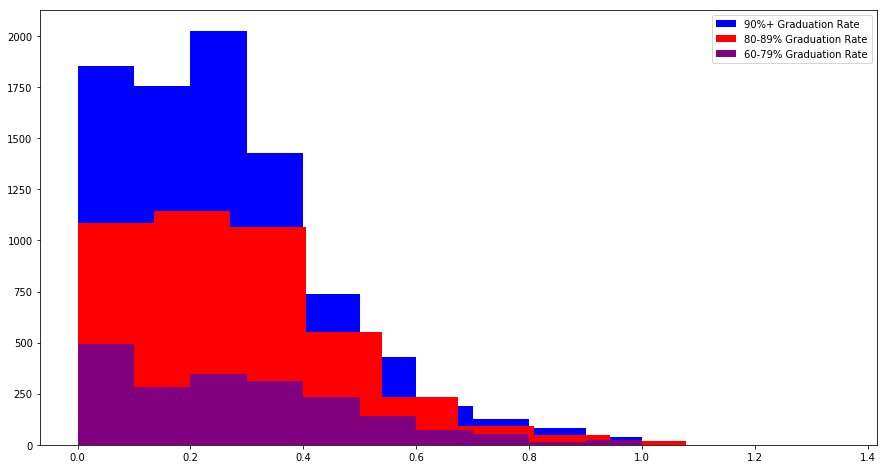

In [41]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['absent_teacher_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['absent_teacher_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['absent_teacher_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

Text(0.5, 1.0, 'More Absenteeism at Low Performing Schools')

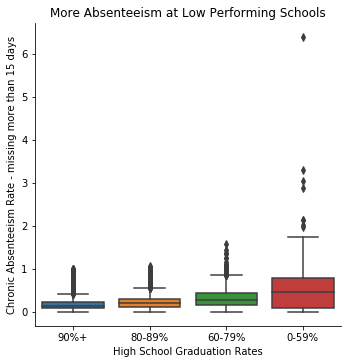

In [186]:
sns.catplot(x="four_rate_bins", y="chronic_absent_rate", kind="box", data=simple)
plt.ylabel('Chronic Absenteeism Rate - missing more than 15 days')
plt.xlabel('High School Graduation Rates')
plt.title('More Absenteeism at Low Performing Schools')

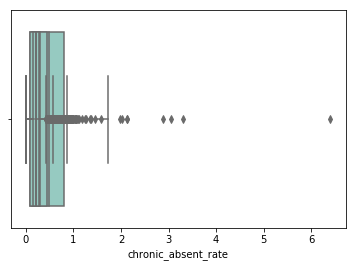

In [49]:
sns.boxplot(x=grad_50['chronic_absent_rate'],palette="Set3")
sns.boxplot(x=grad_70['chronic_absent_rate'],palette="Set3")
sns.boxplot(x=grad_80['chronic_absent_rate'],palette="Set3")
sns.boxplot(x=grad_90['chronic_absent_rate'],palette="Set3")

In [50]:
simple.chronic_absent_rate.quantile([0.25,0.5,0.75])


0.25    0.096657
0.50    0.180701
0.75    0.294678
Name: chronic_absent_rate, dtype: float64

In [72]:
np.nanpercentile(grad_90.chronic_absent_rate, (25, 50, 75), axis=0)

array([0.08310689, 0.14583333, 0.22157849])

In [127]:
#great metric showing steady change with graduation rates
print('90%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_90.chronic_absent_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_80.chronic_absent_rate.quantile([0.25,0.5,0.75]))
print('60%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_70.chronic_absent_rate.quantile([0.25,0.5,0.75]))
print('50%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_50.chronic_absent_rate.quantile([0.25,0.5,0.75]))

90%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.083107
0.50    0.145833
0.75    0.221578
Name: chronic_absent_rate, dtype: float64
80%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.126976
0.50    0.209524
0.75    0.302113
Name: chronic_absent_rate, dtype: float64
60%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.160080
0.50    0.283876
0.75    0.437500
Name: chronic_absent_rate, dtype: float64
50%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.085595
0.50    0.475865
0.75    0.790489
Name: chronic_absent_rate, dtype: float64


In [76]:
#great metric as it shows steady change with graduation rate
print('90%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_90.sports_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_80.sports_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_70.sports_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_50.sports_rate.quantile([.25, .50, .75]))

90%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.320988
0.50    0.467752
0.75    0.649728
Name: sports_rate, dtype: float64
80%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.275554
0.50    0.388697
0.75    0.536686
Name: sports_rate, dtype: float64
60%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.220779
0.50    0.322964
0.75    0.451950
Name: sports_rate, dtype: float64
50%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.124414
0.50    0.242395
0.75    0.406508
Name: sports_rate, dtype: float64


In [134]:
percentile_list25 = []
percentile_list75 = []

In [141]:
for i in range(0,len(simple['non_cert_rate'])):
   percentile_list25.append(simple.non_cert_rate.quantile([.25]))
   percentile_list75.append(simple.non_cert_rate.quantile([.75]))

In [133]:
#great metric as it shows steady change with graduation rate
print('90%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_90.sports_rate.quantile([.25, .75]))
print('80%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_80.sports_rate.quantile([.25, .75]))
print('60%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_70.sports_rate.quantile([.25, .75]))
print('50%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):\n',grad_50.sports_rate.quantile([.25, .75]))

90%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.320988
0.75    0.649728
Name: sports_rate, dtype: float64
80%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.275554
0.75    0.536686
Name: sports_rate, dtype: float64
60%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.220779
0.75    0.451950
Name: sports_rate, dtype: float64
50%+ Graduate Sports Participation Rate (25th, 50th, 75th percentile):
 0.25    0.124414
0.75    0.406508
Name: sports_rate, dtype: float64


In [131]:
for each_rate in grads    
    for i in grad_90.sports_rate:
        simple['level_up_sports_rate_a'] = grad_90.sports_rate.quantile(.25)
        simple['level_up_sports_rate_b'] = grad_90.sports_rate.quantile(.75)
    for i in grad_80.sports_rate:
        simple['level_up_sports_rate_a'] = grad_80.sports_rate.quantile(.25)
        simple['level_up_sports_rate_b'] = grad_80.sports_rate.quantile(.75)
    for i in grad_70.sports_rate:
        simple['level_up_sports_rate_a'] = grad_70.sports_rate.quantile(.25)
        simple['level_up_sports_rate_b'] = grad_70.sports_rate.quantile(.75)
    for i in grad_50.sports_rate:
        simple['level_up_sports_rate_a'] = grad_50.sports_rate.quantile(.25)
        simple['level_up_sports_rate_b'] = grad_50.sports_rate.quantile(.75)

Text(0.5, 1.0, 'More Sports Participation at Schools with Higher Graduation Rates')

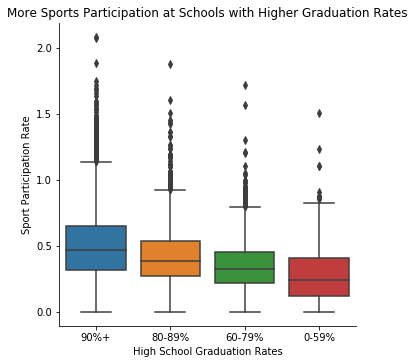

In [189]:
sns.catplot(x="four_rate_bins", y="sports_rate", kind="box", data=simple)
plt.ylabel('Sport Participation Rate')
plt.xlabel('High School Graduation Rates')
plt.title('More Sports Participation at Schools with Higher Graduation Rates')

In [77]:
#Useful metric
print('90%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):\n',grad_90.ap_ib_de_rate.quantile([.25, .50, .75]))
print('80%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):\n',grad_80.ap_ib_de_rate.quantile([.25, .50, .75]))
print('60%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):\n',grad_70.ap_ib_de_rate.quantile([.25, .50, .75]))
print('50%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):\n',grad_50.ap_ib_de_rate.quantile([.25, .50, .75]))

90%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):
 0.25    0.293801
0.50    0.406880
0.75    0.550028
Name: ap_ib_de_rate, dtype: float64
80%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):
 0.25    0.243018
0.50    0.335142
0.75    0.430713
Name: ap_ib_de_rate, dtype: float64
60%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):
 0.25    0.147051
0.50    0.237410
0.75    0.309102
Name: ap_ib_de_rate, dtype: float64
50%+ Graduate AP/IB/DE Rate (25th, 50th, 75th percentile):
 0.25    0.221582
0.50    0.279730
0.75    0.419434
Name: ap_ib_de_rate, dtype: float64


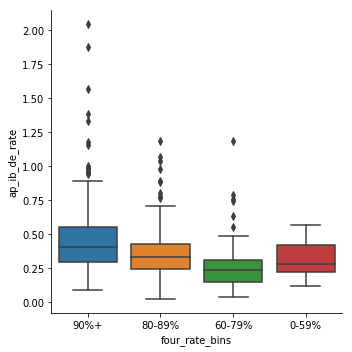

In [99]:
sns.catplot(x="four_rate_bins", y="ap_ib_de_rate", kind="box", data=simple);

In [78]:
#useful metric for most categories
print('90%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_90.absent_teacher_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_80.absent_teacher_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_70.absent_teacher_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_50.absent_teacher_rate.quantile([.25, .50, .75]))

90%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.119789
0.50    0.232558
0.75    0.352941
Name: absent_teacher_rate, dtype: float64
80%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.131069
0.50    0.258065
0.75    0.388283
Name: absent_teacher_rate, dtype: float64
60%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.099162
0.50    0.264151
0.75    0.412043
Name: absent_teacher_rate, dtype: float64
50%+ Graduate Teacher Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.181818
0.75    0.400000
Name: absent_teacher_rate, dtype: float64


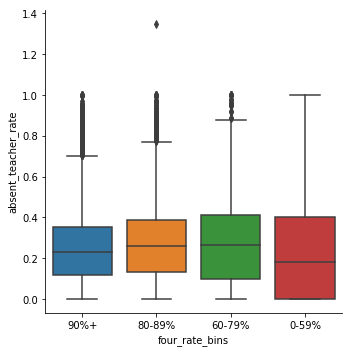

In [100]:
sns.catplot(x="four_rate_bins", y="absent_teacher_rate", kind="box", data=simple);

In [79]:
#No real difference for three categories.
print('90%+ Graduate Counselor Rate (25th, 50th, 75th percentile):\n',grad_90.counselor_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Counselor Rate (25th, 50th, 75th percentile):\n',grad_80.counselor_rate.quantile([.25, .50, .75]))
print('60%+ Graduate counselor Rate (25th, 50th, 75th percentile):\n',grad_70.counselor_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Counselor Rate (25th, 50th, 75th percentile):\n',grad_50.counselor_rate.quantile([.25, .50, .75]))

90%+ Graduate Counselor Rate (25th, 50th, 75th percentile):
 0.25    0.002451
0.50    0.003125
0.75    0.004143
Name: counselor_rate, dtype: float64
80%+ Graduate Counselor Rate (25th, 50th, 75th percentile):
 0.25    0.002469
0.50    0.003155
0.75    0.004107
Name: counselor_rate, dtype: float64
60%+ Graduate counselor Rate (25th, 50th, 75th percentile):
 0.25    0.002381
0.50    0.003238
0.75    0.004539
Name: counselor_rate, dtype: float64
50%+ Graduate Counselor Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.003702
0.75    0.007194
Name: counselor_rate, dtype: float64


In [187]:
#Useful metric for 60, 80 and 90 categories
print('90%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_90.non_cert_rate.mean())
print('80%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_80.non_cert_rate.mean())
print('60%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_70.non_cert_rate.mean())
print('50%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_50.non_cert_rate.mean())

90%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.021344872634142035
80%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.02709974567512341
60%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.04965256166578464
50%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.06926008054957584


In [80]:
#Useful metric for 60, 80 and 90 categories
print('90%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_90.non_cert_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_80.non_cert_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_70.non_cert_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):\n',grad_50.non_cert_rate.quantile([.25, .50, .75]))

90%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.000000
0.75    0.001256
Name: non_cert_rate, dtype: float64
80%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.000000
0.75    0.023318
Name: non_cert_rate, dtype: float64
60%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.000000
0.75    0.052632
Name: non_cert_rate, dtype: float64
50%+ Graduate Non-Certified Teacher Rate (25th, 50th, 75th percentile):
 0.25    0.00000
0.50    0.00000
0.75    0.04202
Name: non_cert_rate, dtype: float64


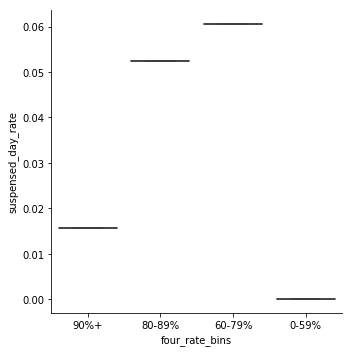

In [175]:
sns.catplot(x="four_rate_bins", y="suspensed_day_rate", kind="box", data=simple);

In [143]:
grad_90.geometry_rate.quantile([.25, .50, .75])

0.25    0.167045
0.50    0.221357
0.75    0.257932
Name: geometry_rate, dtype: float64

In [83]:
#similar rates for all categories
print('90%+ Graduate Geometry Rate (25th, 50th, 75th percentile):\n',grad_90.geometry_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Geometry Rate (25th, 50th, 75th percentile):\n',grad_80.geometry_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Geometry Rate (25th, 50th, 75th percentile):\n',grad_70.geometry_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Geometry Rate (25th, 50th, 75th percentile):\n',grad_50.geometry_rate.quantile([.25, .50, .75]))

90%+ Graduate Geometry Rate (25th, 50th, 75th percentile):
 0.25    0.167045
0.50    0.221357
0.75    0.257932
Name: geometry_rate, dtype: float64
80%+ Graduate Geometry Rate (25th, 50th, 75th percentile):
 0.25    0.171419
0.50    0.225275
0.75    0.264151
Name: geometry_rate, dtype: float64
60%+ Graduate Geometry Rate (25th, 50th, 75th percentile):
 0.25    0.171026
0.50    0.234081
0.75    0.280000
Name: geometry_rate, dtype: float64
50%+ Graduate Geometry Rate (25th, 50th, 75th percentile):
 0.25    0.124335
0.50    0.205479
0.75    0.292152
Name: geometry_rate, dtype: float64


In [84]:
#nothing
print('90%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):\n',grad_90.harassed_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):\n',grad_80.harassed_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):\n',grad_70.harassed_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):\n',grad_50.harassed_rate.quantile([.25, .50, .75]))

90%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.000000
0.75    0.001945
Name: harassed_rate, dtype: float64
80%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.000000
0.75    0.002052
Name: harassed_rate, dtype: float64
60%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.000000
0.75    0.001416
Name: harassed_rate, dtype: float64
50%+ Graduate Harassment & Bullying Rate (25th, 50th, 75th percentile):
 0.25    0.0
0.50    0.0
0.75    0.0
Name: harassed_rate, dtype: float64


In [188]:
#Could be a good metric. 
print('90%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_90.suspensed_day_rate.mean())
print('80%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_80.suspensed_day_rate.mean())
print('60%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_70.suspensed_day_rate.mean())
print('50%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_50.suspensed_day_rate.mean())

90%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.12148023932258317
80%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.2843053118996941
60%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.5438027350729959
50%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.5089552025171067


In [85]:
#Could be a good metric. 
print('90%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_90.suspensed_day_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_80.suspensed_day_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_70.suspensed_day_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):\n',grad_50.suspensed_day_rate.quantile([.25, .50, .75]))

90%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.25    0.015659
0.50    0.059701
0.75    0.145930
Name: suspensed_day_rate, dtype: float64
80%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.25    0.052518
0.50    0.149297
0.75    0.351397
Name: suspensed_day_rate, dtype: float64
60%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.25    0.060664
0.50    0.262857
0.75    0.672138
Name: suspensed_day_rate, dtype: float64
50%+ Graduate Suspension Day Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.098246
0.75    0.503487
Name: suspensed_day_rate, dtype: float64


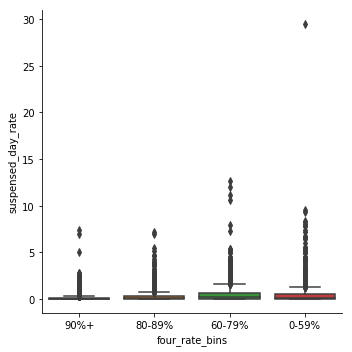

In [102]:
sns.catplot(x="four_rate_bins", y="suspensed_day_rate", kind="box", data=simple);


In [86]:
#another good metric
print('90%+ Graduate Calculus Rate (25th, 50th, 75th percentile):\n',grad_90.calc_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Calculus Rate (25th, 50th, 75th percentile):\n',grad_80.calc_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Calculus Rate (25th, 50th, 75th percentile):\n',grad_70.calc_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Calculus Rate (25th, 50th, 75th percentile):\n',grad_50.calc_rate.quantile([.25, .50, .75]))

90%+ Graduate Calculus Rate (25th, 50th, 75th percentile):
 0.25    0.024622
0.50    0.042122
0.75    0.073845
Name: calc_rate, dtype: float64
80%+ Graduate Calculus Rate (25th, 50th, 75th percentile):
 0.25    0.018066
0.50    0.030563
0.75    0.052014
Name: calc_rate, dtype: float64
60%+ Graduate Calculus Rate (25th, 50th, 75th percentile):
 0.25    0.014412
0.50    0.024904
0.75    0.044580
Name: calc_rate, dtype: float64
50%+ Graduate Calculus Rate (25th, 50th, 75th percentile):
 0.25    0.009524
0.50    0.022088
0.75    0.044647
Name: calc_rate, dtype: float64


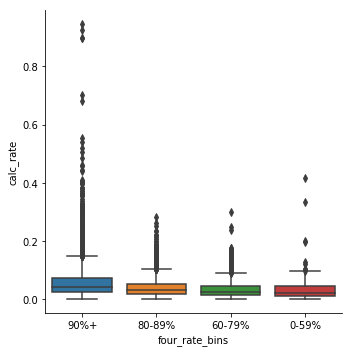

In [103]:
sns.catplot(x="four_rate_bins", y="calc_rate", kind="box", data=simple);

In [87]:
#no much here
print('90%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):\n',grad_90.algebra2_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):\n',grad_80.algebra2_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):\n',grad_70.algebra2_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):\n',grad_50.algebra2_rate.quantile([.25, .50, .75]))

90%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):
 0.25    0.145094
0.50    0.200665
0.75    0.240635
Name: algebra2_rate, dtype: float64
80%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):
 0.25    0.137637
0.50    0.190202
0.75    0.232334
Name: algebra2_rate, dtype: float64
60%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):
 0.25    0.128352
0.50    0.186484
0.75    0.233993
Name: algebra2_rate, dtype: float64
50%+ Graduate Algebra II Rate (25th, 50th, 75th percentile):
 0.25    0.074367
0.50    0.145299
0.75    0.234043
Name: algebra2_rate, dtype: float64


In [88]:
#not much here
print('90%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):\n',grad_90.pass_algebra_rate.quantile([.25, .50, .75]))
print('80%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):\n',grad_80.pass_algebra_rate.quantile([.25, .50, .75]))
print('60%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):\n',grad_70.pass_algebra_rate.quantile([.25, .50, .75]))
print('50%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):\n',grad_50.pass_algebra_rate.quantile([.25, .50, .75]))

90%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):
 0.25    0.157080
0.50    0.195435
0.75    0.244874
Name: pass_algebra_rate, dtype: float64
80%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):
 0.25    0.154331
0.50    0.191648
0.75    0.232295
Name: pass_algebra_rate, dtype: float64
60%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):
 0.25    0.147175
0.50    0.192512
0.75    0.239561
Name: pass_algebra_rate, dtype: float64
50%+ Graduate Pass Algebra I Rate (25th, 50th, 75th percentile):
 0.25    0.116150
0.50    0.171919
0.75    0.261735
Name: pass_algebra_rate, dtype: float64


In [89]:
#useful metric
print('90%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):\n',grad_90.sat_act_rate.quantile([.25, .50, .75]))
print('80%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):\n',grad_80.sat_act_rate.quantile([.25, .50, .75]))
print('60%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):\n',grad_70.sat_act_rate.quantile([.25, .50, .75]))
print('50%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):\n',grad_50.sat_act_rate.quantile([.25, .50, .75]))

90%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):
 0.25    0.137159
0.50    0.219551
0.75    0.295834
Name: sat_act_rate, dtype: float64
80%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):
 0.25    0.118482
0.50    0.195906
0.75    0.257885
Name: sat_act_rate, dtype: float64
60%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):
 0.25    0.067729
0.50    0.156729
0.75    0.235448
Name: sat_act_rate, dtype: float64
50%+ Graduate SAT/ACT Rate (25th, 50th, 75th percentile):
 0.25    0.000000
0.50    0.036036
0.75    0.150875
Name: sat_act_rate, dtype: float64


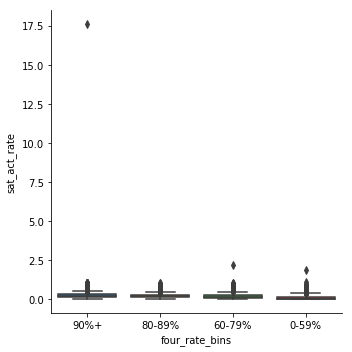

In [104]:
sns.catplot(x="four_rate_bins", y="sat_act_rate", kind="box", data=simple);

In [95]:
#level up bins
#create the binned categories
simple['level_up_bins'] = pd.cut(simple['grad_slice'].astype(int), 
    [0, 59, 79, 89, 100], labels = ['60-79% Level Up Rate', '80-89% Level Up Rate', '90%+ Level Up Rate', '100% Level Up Rate'])

In [142]:
simple.head()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,...,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate,grad_slice,grad_rate_bin,four_rate_bins,level_up_sports_rate_a,level_up_sports_rate_b
0,0,0,0,0,0,ALABAMA,Albertville City,10000500871,Albertville High Sch,296,...,0.000000,2811.937359,0.0,0.003475,0.378788,92,90%+,90%+,0.124414,0.406508
1,1,1,1,1,1,ALABAMA,Marshall County,10000600872,Asbury Sch,67,...,0.003711,4825.189777,0.0,0.002783,0.100000,95,90%+,90%+,0.124414,0.406508
2,2,2,2,2,2,ALABAMA,Marshall County,10000600878,Douglas High Sch,153,...,0.008418,5317.932795,0.0,0.001684,0.105263,85,80-89%,80-89%,0.124414,0.406508
3,3,3,3,3,3,ALABAMA,Marshall County,10000600883,Kate D Smith DAR High Sch,120,...,0.000000,5909.375686,0.0,0.002179,0.068966,80,80-89%,80-89%,0.124414,0.406508
4,4,4,4,4,4,ALABAMA,Marshall County,10000601585,Brindlee Mt High Sch,94,...,0.000000,3962.305785,0.0,0.002755,0.101010,85,80-89%,80-89%,0.124414,0.406508


In [ ]:
#code from greg to make loop to go through variables to choose most important 
#one for each school
var_sweep = {}
for col in cols:
  delta = np.stdev(data[col])
  tmp = data.copy()
  tmp[col] = tmp[col] + delta
  var_sweep[col] = model.predict(tmp.values)
